## Problem statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.
Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

##The Hypotheses

#### -Stores located in cities or urban areas may generate higher sales due to density of population being high
#### -Cities and urban areas may have populations in the higher income bracket, thus contributing to higher sales
#### -Larger stores should technically generate higher sales
#### -Absence of other competitor stores should allow for higher sales
#### -Effective marketing should drive higher sales
#### -Good customer service should yield higher sales

#### -Brands affect sales; branded products yield higher sales
#### -Effective product marketing, popular products will increase sales especially through word of mouth
#### -Daily essentials products or products with high utility will generate more sales
#### -Products on offer or sale will yield higher sales due to hype and demand

##Importing Dataset

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Read files 
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')



In [4]:
train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [7]:
#Combine the train and test data in one single dataset

data = pd.concat([train, test], axis = 0, ignore_index = True)
print(train.shape, test.shape, data.shape)
data

(8523, 12) (5681, 11) (14204, 12)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


##Exploratory Data Analysis

In [8]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [34]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

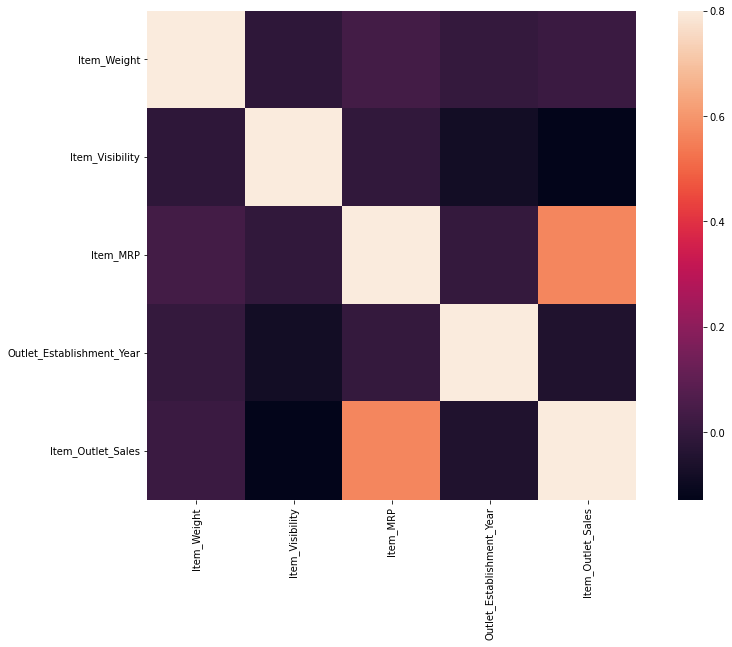

In [12]:
#correlation
correl=data.corr()
ax=plt.subplots(figsize=(15,9))
sns.heatmap(correl,vmax=0.8,square=True)

In [13]:
train.Item_Fat_Content.value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [14]:
train.Item_Type.value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [15]:
train.Outlet_Identifier.value_counts()

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [16]:
train.Outlet_Size.value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [17]:
train.Outlet_Location_Type.value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

In [18]:
train.Outlet_Type.value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [19]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

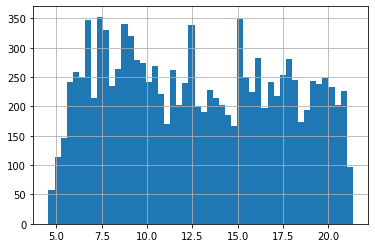

In [20]:
data.Item_Weight.hist(bins=50)


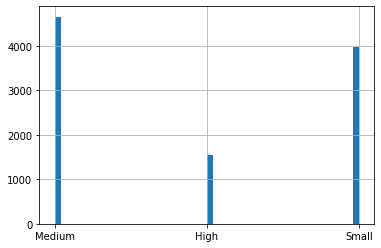

In [21]:

data.Outlet_Size.hist(bins=50)

In [22]:
data.apply(lambda x:len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
dtype: int64

In [23]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [25]:
#gather categorical data

categorical_columns=[x for x in data.dtypes.index if data.dtypes[x]=='object']
categorical_columns

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [26]:
#drop item_identifier and outlet_identifier

categorical_columns=[x for x in categorical_columns if x not in ['Item_Identifier','Outlet_Identifier']]
categorical_columns

['Item_Fat_Content',
 'Item_Type',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [31]:
#print frequencies of these categories
for col in categorical_columns:
    print('frequency of categories for variable')
    print(data[col].value_counts())
    print("_"*50)

frequency of categories for variable
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64
__________________________________________________
frequency of categories for variable
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64
__________________________________________________
frequency of categories for variable
Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64
__________________________________________________
frequency of categories for vari

In [32]:
#filling the missing values with the mean
data.Item_Weight.fillna(data.Item_Weight.mean(),inplace=True)

In [35]:
# Replace LF and low fat to Low Fat and reg to Regular
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat',
                                                             'reg':'Regular',
                                                             'low fat':'Low Fat'})

# Check
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

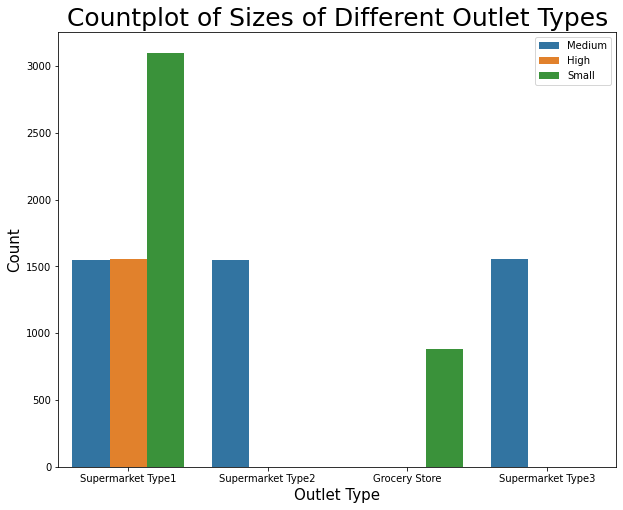

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot bar chart of different outlet sizes 
plt.figure(figsize = (10, 8))
sns.countplot(x = 'Outlet_Type', hue = 'Outlet_Size', data = data)
plt.legend(loc='upper right')
plt.title('Countplot of Sizes of Different Outlet Types', fontsize = 25)
plt.xlabel('Outlet Type', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

plt.show()

In [37]:
# Replace missing values in Outlet_Size colun with respective values stated above
data.loc[data['Outlet_Size'].isnull(), 'Outlet_Size'] = data[data['Outlet_Type'] == 'Supermarket Type1'].loc[data['Outlet_Size'].isnull(), 'Outlet_Size'].apply(lambda x: 'Small')
data.loc[data['Outlet_Size'].isnull(), 'Outlet_Size'] = data[data['Outlet_Type'] == 'Supermarket Type2'].loc[data['Outlet_Size'].isnull(), 'Outlet_Size'].apply(lambda x: 'Medium')
data.loc[data['Outlet_Size'].isnull(), 'Outlet_Size'] = data[data['Outlet_Type'] == 'Supermarket Type3'].loc[data['Outlet_Size'].isnull(), 'Outlet_Size'].apply(lambda x: 'Medium')
data.loc[data['Outlet_Size'].isnull(), 'Outlet_Size'] = data[data['Outlet_Type'] == 'Grocery Store'].loc[data['Outlet_Size'].isnull(), 'Outlet_Size'].apply(lambda x: 'Small')

In [38]:
# Check for null values, there should be 0 null values now in the Outlet_Size column
print('Number of missing values in Outlet_Size column: {}'.format(data['Outlet_Size'].isnull().sum()))

Number of missing values in Outlet_Size column: 0


In [39]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

##Encoding

In [41]:

#now import labelEncoding
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
data['Outlet']=lb.fit_transform(data['Outlet_Identifier'])
var=['Item_Fat_Content','Outlet_Location_Type','Outlet_Type','Outlet_Size','Item_Type']
lb=LabelEncoder()
for item in var:
    data[item]=lb.fit_transform(data[item])

In [42]:
data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet
0,FDA15,9.30,0,0.016047,4,249.8092,OUT049,1999,1,0,1,3735.1380,9
1,DRC01,5.92,1,0.019278,14,48.2692,OUT018,2009,1,2,2,443.4228,3
2,FDN15,17.50,0,0.016760,10,141.6180,OUT049,1999,1,0,1,2097.2700,9
3,FDX07,19.20,1,0.000000,6,182.0950,OUT010,1998,2,2,0,732.3800,0
4,NCD19,8.93,0,0.000000,9,53.8614,OUT013,1987,0,2,1,994.7052,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,1,0.013496,13,141.3154,OUT046,1997,2,0,1,NaN,8
14200,FDD47,7.60,1,0.142991,15,169.1448,OUT018,2009,1,2,2,NaN,3
14201,NCO17,10.00,0,0.073529,8,118.7440,OUT045,2002,2,1,1,NaN,7
14202,FDJ26,15.30,1,0.000000,3,214.6218,OUT017,2007,2,1,1,NaN,2


In [65]:
#Train and Test Data
x_train=data.iloc[:8523,1:11]
x_test=data.iloc[8523:,1:11]

y_train=data.iloc[:8523,11]
y_test=data.iloc[8523:,11]




In [67]:
x_train.drop('Outlet_Identifier',inplace=True,axis=1)
x_test.drop('Outlet_Identifier',inplace=True,axis=1)

In [57]:
y_train

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [58]:
y_test

8523    NaN
8524    NaN
8525    NaN
8526    NaN
8527    NaN
         ..
14199   NaN
14200   NaN
14201   NaN
14202   NaN
14203   NaN
Name: Item_Outlet_Sales, Length: 5681, dtype: float64

##Standard Scaling

In [68]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)


#Visualisation
x_train=pd.DataFrame(x_train)
print(x_train)
y_train=pd.DataFrame(y_train)
print(y_train)

             0         1         2         3         4         5         6  \
0    -0.839226 -0.738147 -0.970732 -0.766479  1.747454  0.139541 -0.664080   
1    -1.639047  1.354743 -0.908111  1.608963 -1.489023  1.334103 -0.664080   
2     1.101168 -0.738147 -0.956917  0.658786  0.010040  0.139541 -0.664080   
3     1.503445  1.354743 -1.281758 -0.291391  0.660050  0.020085  0.799954   
4    -0.926780 -0.738147 -1.281758  0.421242 -1.399220 -1.293934 -2.128115   
...        ...       ...       ...       ...       ...       ...       ...   
8518 -1.415428 -0.738147 -0.181193  1.371418  1.180783 -1.293934 -2.128115   
8519 -1.056929  1.354743 -0.371154 -1.716656 -0.527301  0.497909  0.799954   
8520 -0.531602 -0.738147 -0.599784  0.183698 -0.897208  0.736822  0.799954   
8521 -1.333790  1.354743  1.532880  1.371418 -0.607977  1.334103 -0.664080   
8522  0.462258 -0.738147 -0.411936  1.608963 -1.052261 -0.099372  0.799954   

             7         8  
0    -1.369334 -0.252658  
1     1.0

##Linear regression

In [91]:
#creating a model
from sklearn.linear_model import LinearRegression

# creating a object
regressor = LinearRegression()

#training the model
regressor.fit(x_train, y_train)

#using the training dataset for the prediction
pred = regressor.predict(x_test)



In [95]:
#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(y_train, pred)
r2 = r2_score(y_train, pred)#Best fit lineplt.scatter(x, y)



#Results
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , regressor.intercept_)
print("Slope :" , regressor.coef_)

ValueError: ignored